# Neural Network Classification

In [3]:
import tensorflow as tf

print(tf.__version__)

import datetime
print(f"Notebook last run on {datetime.datetime.now()}")

2.17.0
Notebook last run on 2024-10-23 20:08:17.838243


## Creating data to view and fit

In [5]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.03)
# Check out the features
X

array([[-0.95055071, -0.3589317 ],
       [-0.90476144,  0.41410688],
       [ 0.07769555, -0.77680653],
       ...,
       [ 0.76334083, -0.0530768 ],
       [-0.72350377, -0.68604874],
       [ 0.00611405, -0.73763208]])

In [18]:
X[0], len(X)

(array([-0.95055071, -0.3589317 ]), 1000)

In [22]:
X[:, 1][:10]

array([-0.3589317 ,  0.41410688, -0.77680653,  0.43141557, -0.09184547,
        1.01474589,  0.72550234,  0.48991296, -0.61757364, -0.37649751])

In [23]:
# See the first 10 labels
y[:10]

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [24]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,-0.950551,-0.358932,0
1,-0.904761,0.414107,0
2,0.077696,-0.776807,1
3,0.919213,0.431416,0
4,0.798655,-0.091845,1


In [25]:
# Check out the different labels
circles.label.value_counts()

label
0    500
1    500
Name: count, dtype: int64

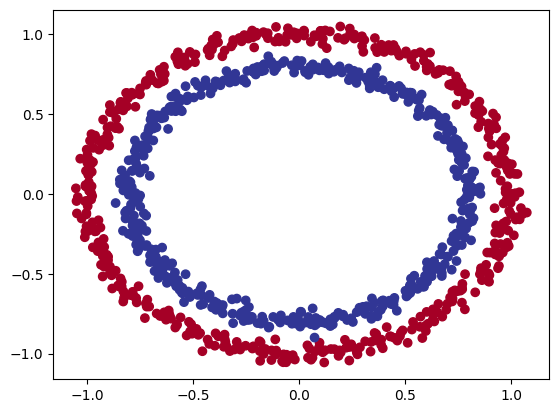

In [32]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [33]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [34]:
# View first examples of features and labels
X[0], y[0]

(array([-0.95055071, -0.3589317 ]), 0)

## Steps in modelling
1. Creating a model
2. Compiling a model
3. Fitting a model

In [43]:
# 1 Create a model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.4679 - loss: 4.0452
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.4994 - loss: 1.3964
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.4869 - loss: 0.7361
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.4656 - loss: 0.7120
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.4796 - loss: 0.7004


In [44]:
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [46]:
# Train the model for longer
model_1.fit(X, y, epochs=200, verbose=0)

model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.5089 - loss: 0.6929


[0.6932370662689209, 0.5]

## Improving the model

In [50]:
# 1 Create a model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

# Fit the model
model_1.fit(X, y, epochs=5, verbose=1)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.5531 - loss: 4.8983
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5294 - loss: 4.8982
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5129 - loss: 2.0934
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5024 - loss: 0.6959
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.4868 - loss: 0.6995


## Visualizing

In [67]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (We're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # plot decision boundaries
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())    

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
doing binary classification...


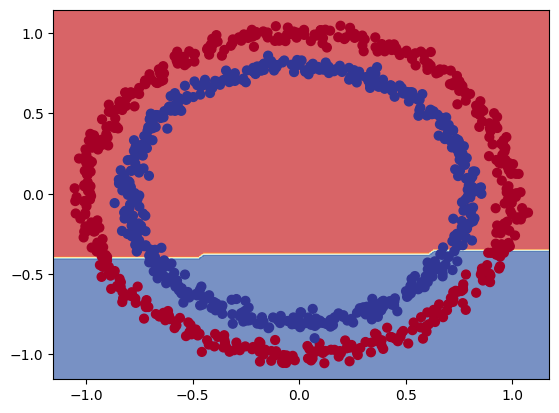

In [68]:
# Check out the predictions the model is making
plot_decision_boundary(model_1, X, y)

In [69]:
model_1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,323 (5.17 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [71]:
# In a regression problem, our model might work. lET'S try it

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [73]:
len(X_regression)

200

In [75]:
len(X_reg_train), len(y_reg_train), len(X_reg_test), len(y_reg_test)

(150, 150, 50, 50)

In [76]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, # regression specific loss function
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])


In [81]:
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=5)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.8668 - mae: 39.8668
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.4543 - mae: 38.4543  
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.2426 - mae: 35.2426 
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.2828 - mae: 38.2828 
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37.9828 - mae: 37.9828  


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


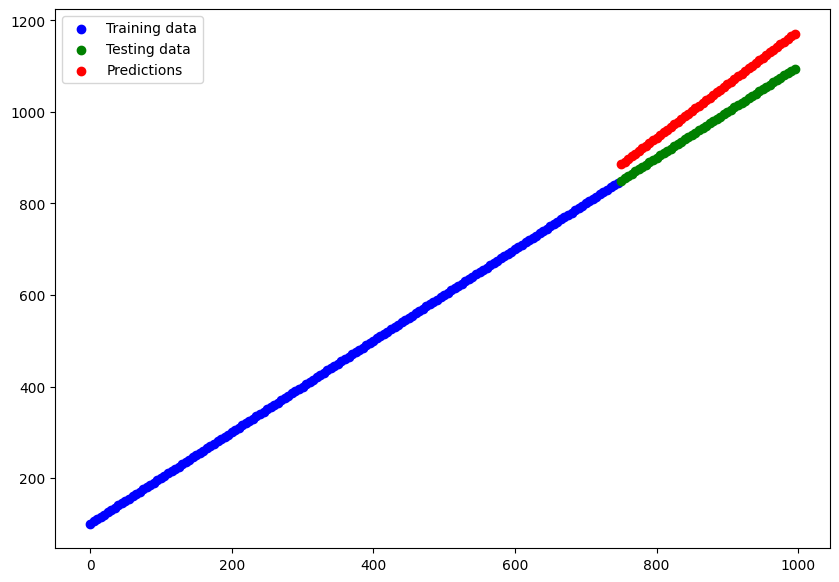

In [82]:
# Make predictions with out trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

The above predictions aren't perfect ( If the predictions were prefect, the red would line up with the green), but they look better than complete guessing.
This means the model is learning something.

# The missing piece is "Non-linearity"

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

In [88]:
# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
    tf.keras.layers.Dense(1) # output layer
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
               metrics=['accuracy'])

# Fit the model
history = model_4.fit(X, y, epochs=10) # trained it 210 epochs

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.4936 - loss: 3.9597
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.5007 - loss: 2.6673 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.4951 - loss: 1.9272
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5012 - loss: 1.1369
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.4997 - loss: 1.1112
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.5097 - loss: 1.0343
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.4808 - loss: 1.0232
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.4480 - loss: 1.0079
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.4143 - loss: 0.9597
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.4289 - loss: 0.8985


### Still under 50% accuracy, the model is still practically as good as guessing.
### How would the predictions look?

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
doing binary classification...


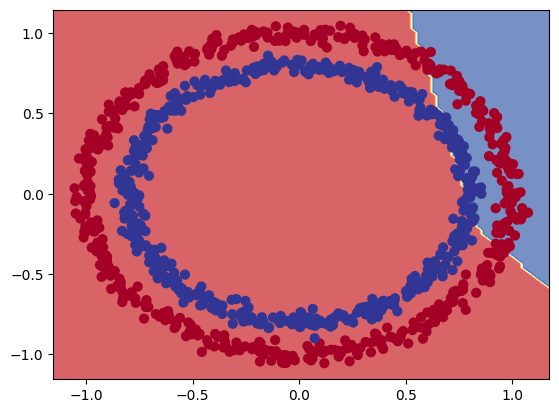

In [89]:
plot_decision_boundary(model_4, X, y)

## This time, we'll change the activaiton function on our output layer too. For binary classification, the output layer activation is usually the Sigmoid activation function.

In [91]:
# Create a model with sigmoid activation function for the output layer
from tensorflow import keras
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # output layer sigmoid function
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [93]:
# Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

In [94]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8903 - loss: 0.3333


[0.33828070759773254, 0.8870000243186951]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
doing binary classification...


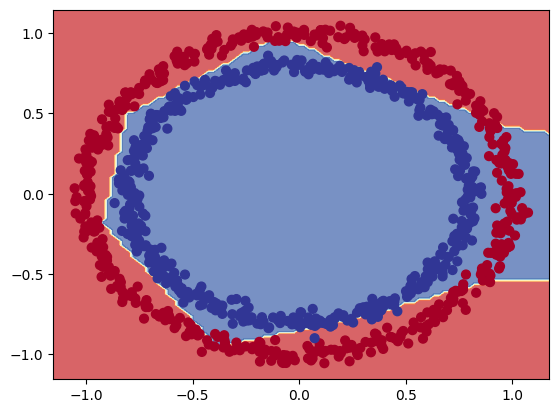

In [95]:
# Plot the  predictions of the model with relu and sigmoid activation
plot_decision_boundary(model_5, X, y)

## 88% accuracy, the model is ALMOST perfectly separating the two circles.

## Note: the combination of linear and non-linear functions is one of the key fundamentals of neural networks.

In [97]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

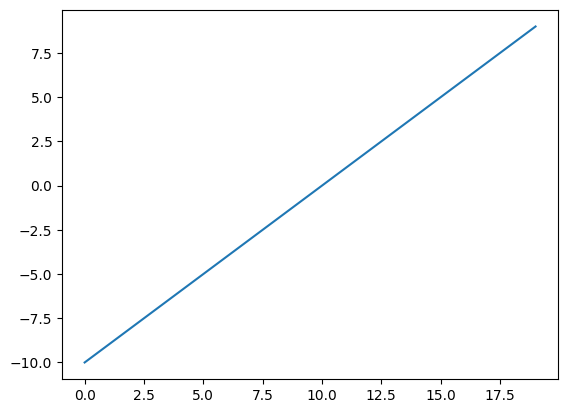

In [99]:
# Visualize toy tensor
plt.plot(A); # a linear line

In [100]:
# Now let's recreate the sigmoid function and see what it does to our data.

# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

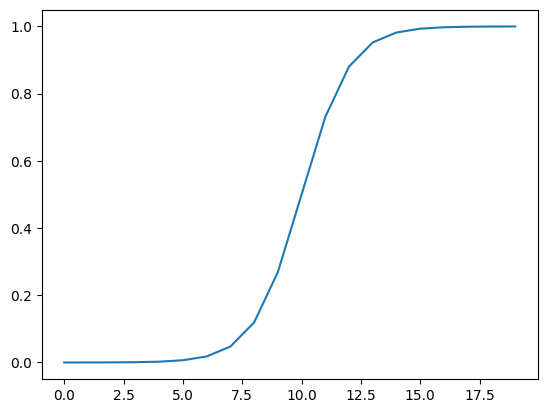

In [103]:
# Plot sigmoid modifies tensor
plt.plot(sigmoid(A));

In [105]:
# How does the ReLU-modifies tensor look like?

# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

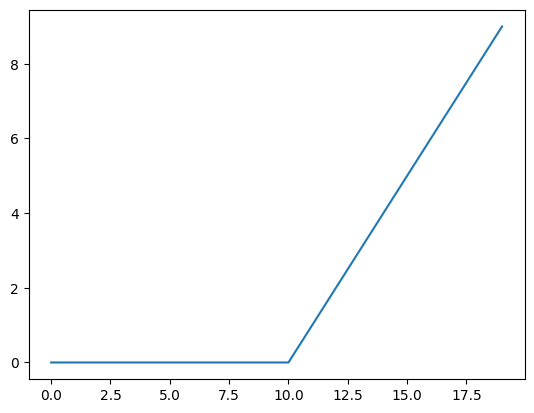

In [106]:
# plot ReLU-modified tensor
plt.plot(relu(A));

## TensorFlow's Linear activation Function?

In [108]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [109]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

So, It makes sense now hte model doesn't learn anyting when using only linear acivation functions, because the linear activation functions does not change our input data in anyway.

Whereas, with non-linear functions, the data gets manipulated. A neural networl uses these kind of transformations at a large scale to figure draw patterns between inputs and outputs.

## Now, Let's split the data into training and testing sets

In [110]:
X_train, y_train = X[:800], y[:800] # 80% for training
X_test, y_test = X[800:], y[800:] # 20% for testing

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the testing set

((800, 2), (200, 2))

In [112]:
X_train[0]

array([-0.95055071, -0.3589317 ])

In [121]:
# Create the model (same as model_7)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5181 - loss: 0.6930 
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.5206 - loss: 0.6864
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5635 - loss: 0.6804
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.6211 - loss: 0.6735
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.5856 - loss: 0.6579
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.7063 - loss: 0.6456
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.6901 - loss: 0.6189
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.7412 - loss: 0.5956
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.8083 - loss: 0.5566
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8416 - loss: 0.5138
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.9362 - loss: 0.4343
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step 

In [122]:
# Evaluate the model on the test set
loss, accuracy = model_6.evaluate(X_test, y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set:{100*accuracy:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9924 - loss: 0.0396
Model loss on the test set: 0.042934078723192215
Model accuracy on the test set:99.00%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
doing binary classification...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
doing binary classification...


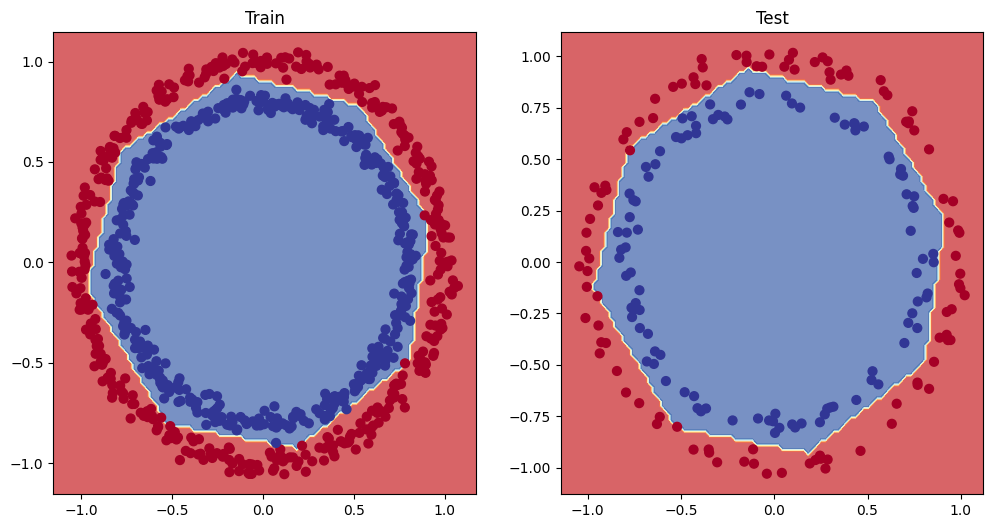

In [123]:
# Plot the deciion boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X=X_test, y=y_test)
plt.show()

## Plot the loss curves

In [130]:
pd.DataFrame(history.history)[20:]

,accuracy,loss
20,0.99875,0.060086
21,0.99625,0.055224
22,0.99750,0.049271
23,0.99500,0.044015
24,0.99625,0.044800


Text(0.5, 1.0, 'Model 6 training curves')

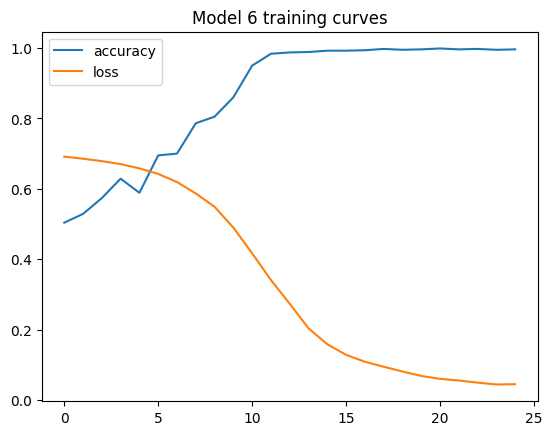

In [131]:
pd.DataFrame(history.history).plot()
plt.title("Model 6 training curves")

## Finding the best learning rate
The most important hyperparameter we can tune for neuaral network models is the "LEARNING RATE"

* A learning rate callback

We can think of a callback as an extra piece pf functionality we can add to our model while its training.

In [134]:
# Create a model (same as model_8)
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
             optimizer="Adam",
             metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# Traverse a set of learning rate values starting from 1e-4(0.001), increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_7.fit(X_train,
                     y_train,
                     epochs=100,
                     callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.4733 - loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.4864 - loss: 0.6940 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5248 - loss: 0.6863 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.5079 - loss: 0.6936 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.4978 - loss: 0.6919 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.4906 - loss: 0.6944 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.5231 - loss: 0.6895 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.4977 - loss: 0.6919 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.4988 - loss: 

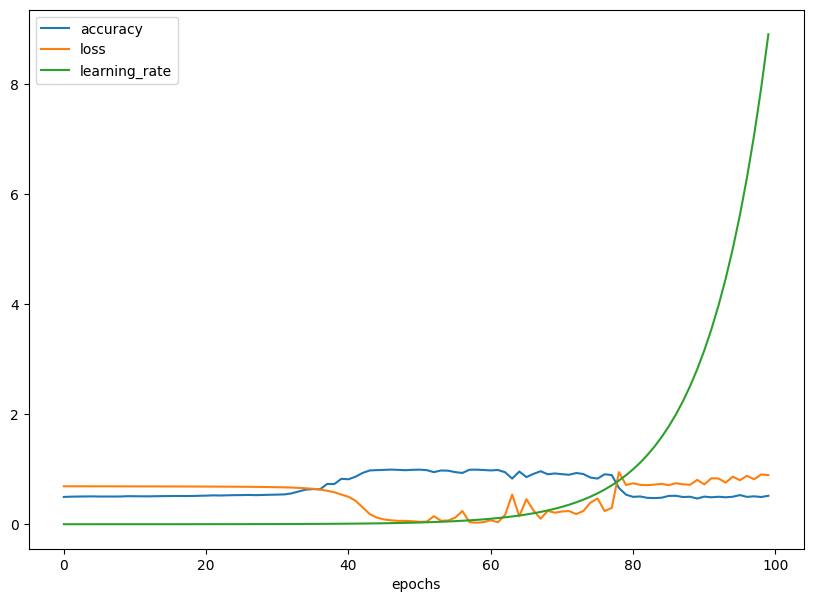

In [135]:
# Check out the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs");

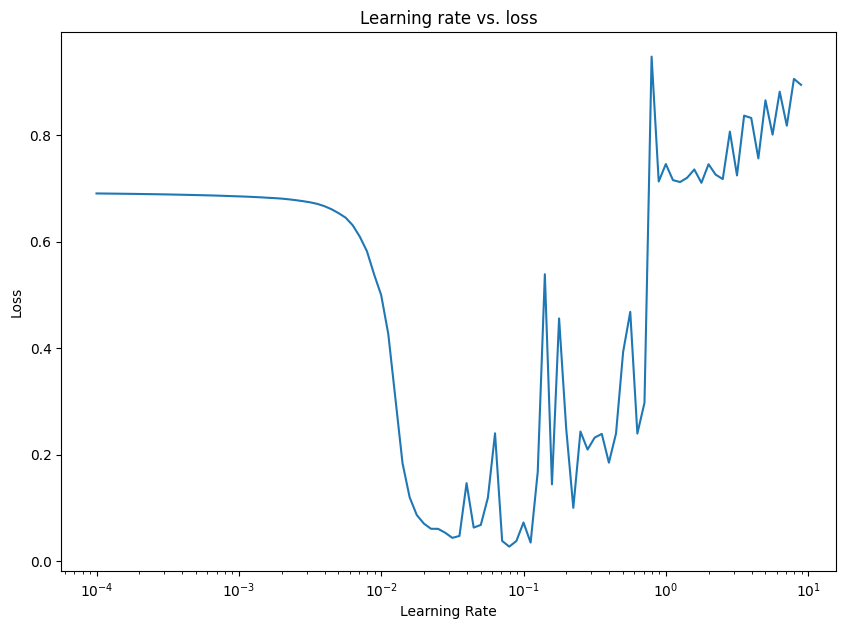

In [137]:
# Plot the learning rate verus loss
lrs = 1e-4 * (10**(np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss']) # we want tjhe x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

## In this case, our ideal learning rate ends up between `0.01` (10^-2) and `0.02`.

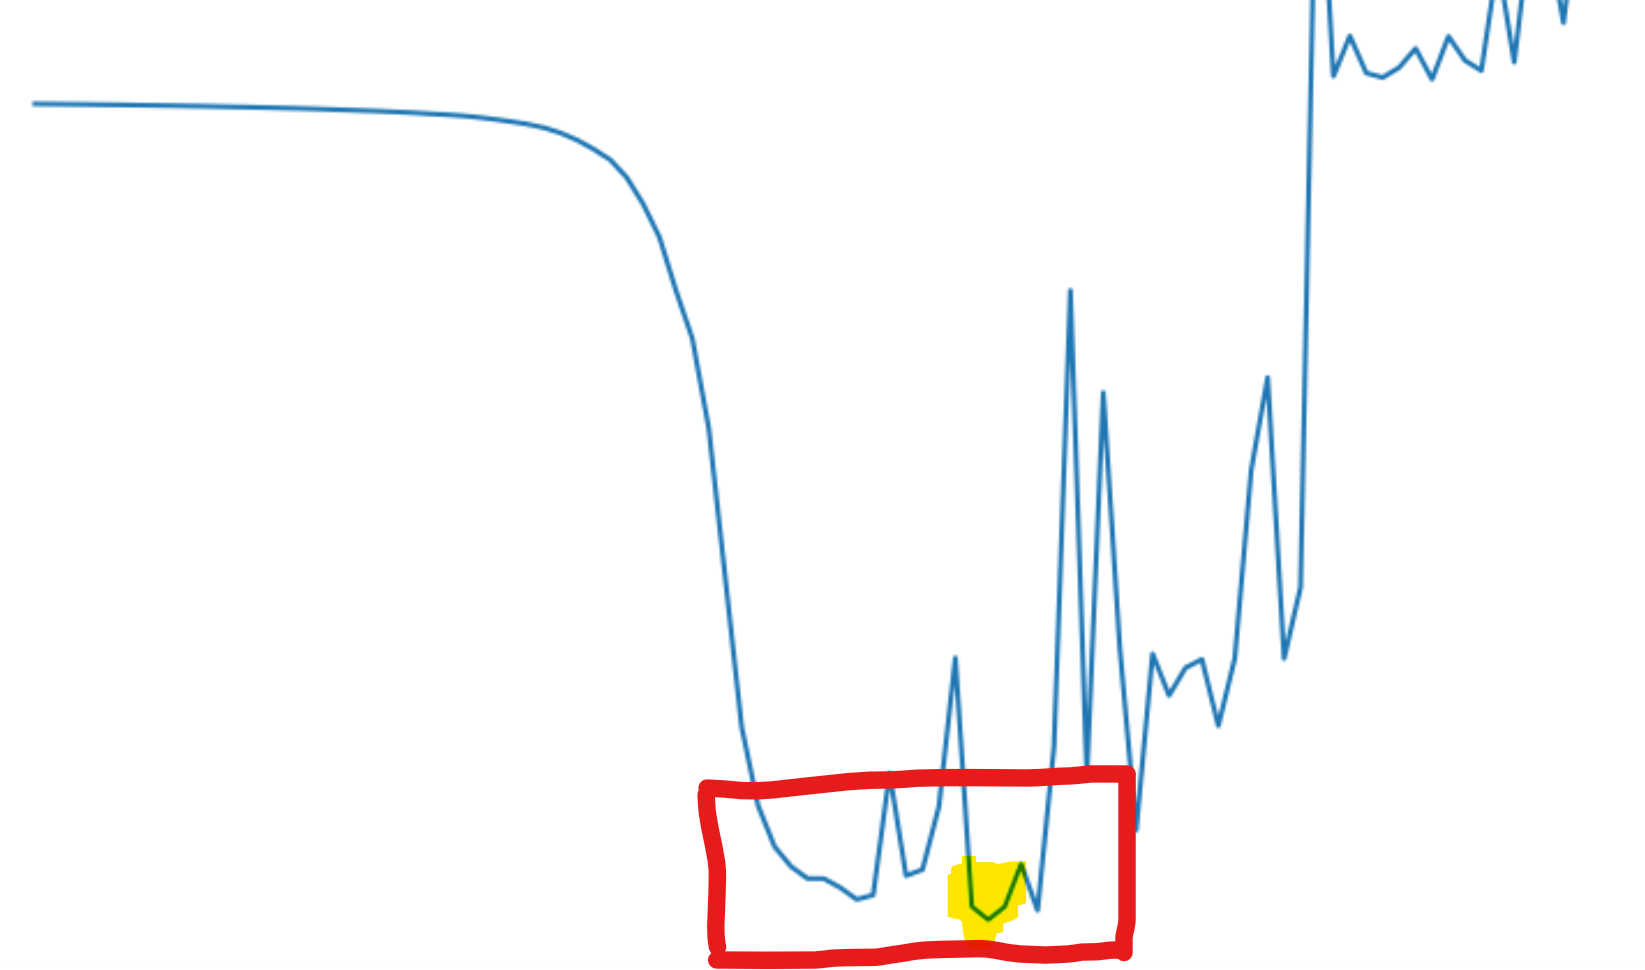

In [138]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

## Now we've estimated the ideal learning rate (we'll use 0.02) for our model, let's refit it.

In [139]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, we need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_8.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4691 - loss: 0.7014
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.5307 - loss: 0.6898
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.5543 - loss: 0.6841
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5910 - loss: 0.6756  
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.6146 - loss: 0.6624
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.6641 - loss: 0.6347
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.7716 - loss: 0.5735
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8826 - loss: 0.4514
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9492 - loss: 0.3229
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9718 - loss: 0.2386
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9920 - loss: 0.1806
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step -

In [141]:
# Evaluate model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9973 - loss: 0.0374


[0.04040469601750374, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
doing binary classification...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
doing binary classification...


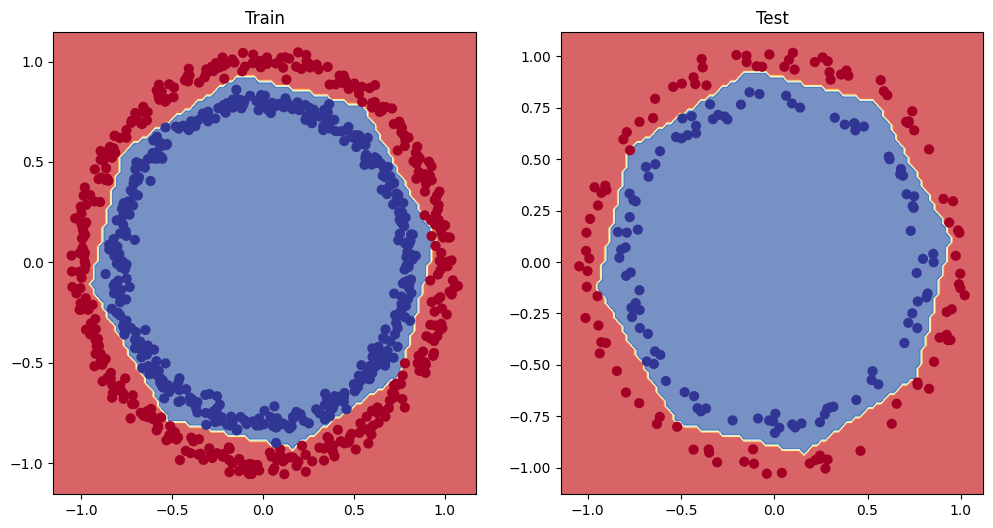

In [143]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [146]:
# Chekc the accuracy of our model
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0374
Model loss on test set: 0.04040469601750374
Model accuracy on test set: 99.50%


In [156]:
y_preds[:10]

array([[0.00180073],
       [0.02135444],
       [0.06762547],
       [0.01718266],
       [0.96756524],
       [0.00112779],
       [0.08693284],
       [0.01659052],
       [0.96756524],
       [0.96756524]], dtype=float32)

In [153]:
y_test[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [154]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [157]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_8.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


array([[101,   1],
       [  0,  98]], dtype=int64)

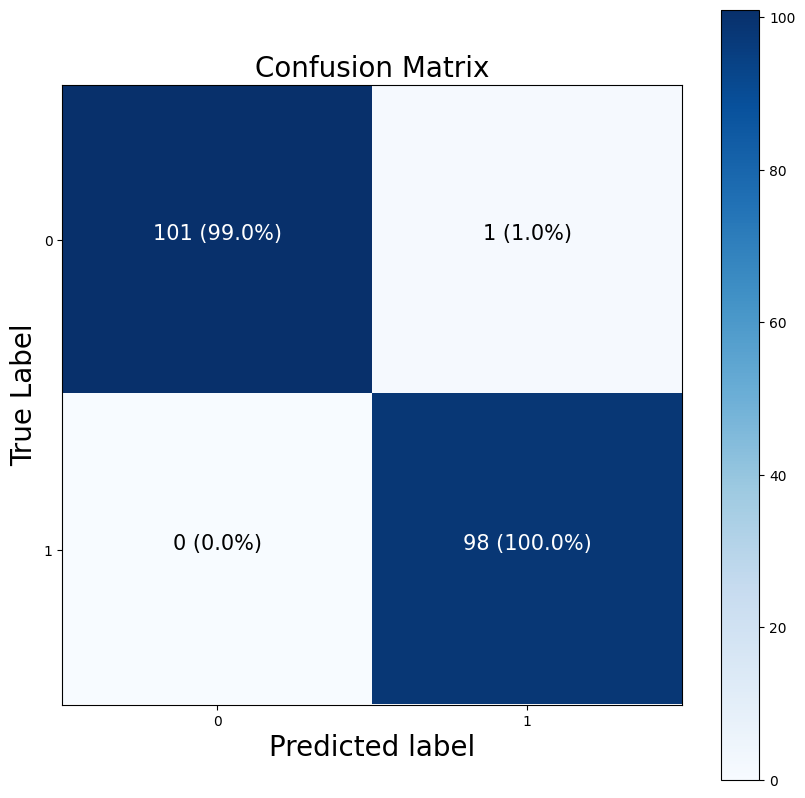

In [160]:
# Making the confusion matrix a little more visual

import itertools

figsize= (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes 
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
      xlabel="Predicted label",
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshhold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [162]:
# What does the itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    print(i, j)

0 0
0 1
1 0
1 1


# Working with a larger example ( Multiclass classification)

In [163]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted out into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [165]:
len(train_data), len(test_data)

(60000, 10000)

In [166]:
# show the first training example
print(f"TRAINING SAMPLE:\n{train_data[0]}\n\n")
print(f"TRAINING LABEL:\n{train_labels[0]}")

TRAINING SAMPLE:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [167]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

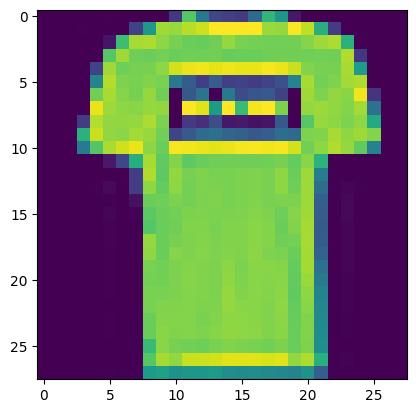

In [174]:
# Plot a single image
import matplotlib.pyplot as plt
plt.imshow(train_data[1]);

In [175]:
train_labels[1]

0

In [177]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

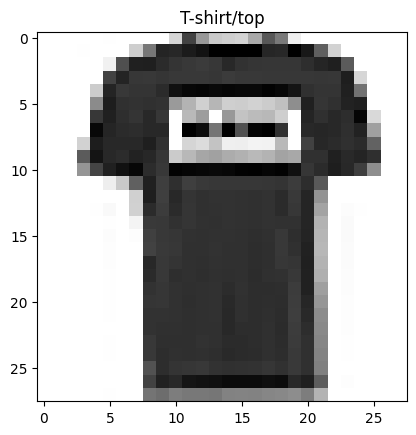

In [178]:
# Plot an example and its label

plt.imshow(train_data[1], cmap=plt.cm.binary) # Change the color to black and white
plt.title(class_names[train_labels[1]]);

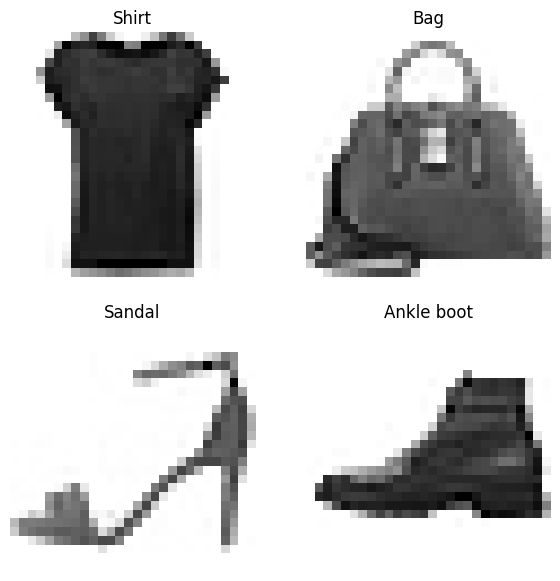

In [182]:
# Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [183]:
# check the min and max values of the traning data
train_data.min(), train_data.max()

(0, 255)

We can get the values between 0 and 1 by dividing the entire array by the maximum: `255.0` ( dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (know as SCALING and NORMALIZATION)

In [185]:
# Divide the train and test images by the max value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [193]:
# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # output shape is 10, so activation is softmax
])

# Compile the model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='Adam',
                metrics=['accuracy'])

# Fit the model (to the normalized data)
norm_history = model_10.fit(train_data,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data, test_labels))

Epoch 1/10


C:\Users\Jamshid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 705us/step - accuracy: 0.4411 - loss: 1.5435 - val_accuracy: 0.6984 - val_loss: 0.8763
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.7160 - loss: 0.8138 - val_accuracy: 0.7590 - val_loss: 0.6890
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.7669 - loss: 0.6594 - val_accuracy: 0.7760 - val_loss: 0.6482
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.7861 - loss: 0.6083 - val_accuracy: 0.7873 - val_loss: 0.6159
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.7945 - loss: 0.5844 - val_accuracy: 0.7938 - val_loss: 0.5989
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.7997 - loss: 0.5691 - val_accuracy: 0.7950 - val_loss: 0.5889
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.8034 - loss: 0.5569 - val_accuracy: 0.7983 - val_loss: 0.5786
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - accuracy: 0.8070 - loss: 0.54

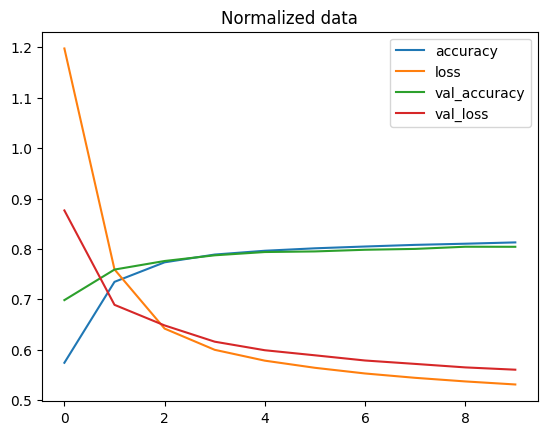

In [194]:
import pandas as pd

# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

## Let's find the ideal learning rate and see what happens?

In [197]:
# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # innput shape 28x28 --> 784
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fit the model
find_lr_history = model_11.fit(train_data,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data, test_labels),
                              callbacks=[lr_scheduler],
                              verbose=0)

C:\Users\Jamshid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


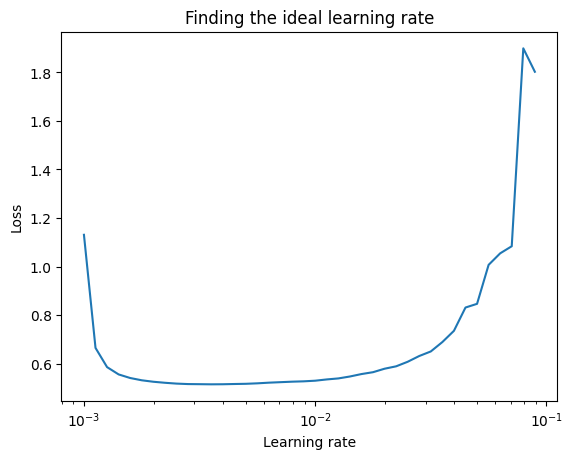

In [198]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss']) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [202]:
# Let's refit the model using the ideal learning rate.

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
history = model_11.fit(train_data,
                      train_labels,
                      epochs=20,
                      validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 671us/step - accuracy: 0.4145 - loss: 1.6224 - val_accuracy: 0.6519 - val_loss: 0.9348
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.6922 - loss: 0.8661 - val_accuracy: 0.7477 - val_loss: 0.7296
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.7587 - loss: 0.7025 - val_accuracy: 0.7697 - val_loss: 0.6609
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.7757 - loss: 0.6445 - val_accuracy: 0.7781 - val_loss: 0.6324
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.7860 - loss: 0.6167 - val_accuracy: 0.7864 - val_loss: 0.6161
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.7923 - loss: 0.5991 - val_accuracy: 0.7914 - val_loss: 0.6048
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.7969 - loss: 0.5865 - val_accuracy: 0.7955 - val_loss: 0.5965
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.7990 -

## Now Let's create a classification matrix to visualize its predictions across the different classes.

In [211]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """
    If classes is passed, confusion matrix will be labelled, if not, integer class values will be used.

    Args:
        y_true: Array of truth labels (must be same shape as y_pred).
        y_pred: Array of predicted labels (must be same shape as y_true).
        classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
        figsize: Size of output figure (default=(10, 10)).
        text_size: Size of output figure text (default=15).

    Returns:
        A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
        make_confusion_matrix(y_true=test_labels, # ground truth test labels
                              y_pred=y_preds, # predicted labels
                              classes=class_names, # array of class label names
                              figsize=(15, 15),
                              text_size=10)
    """
    # create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize it
    n_classes = cm.shape[0]

    # plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # Colors will represent how 'correct' a class is, darker --> better
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshhold
    threshold = (cm.max() + cm.min()) / 2.
    
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else "black",
                size=text_size
        )

In [212]:
# Make predictions with the most recent model
y_probs = model_11.predict(test_data)

y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step


array([[1.1424870e-16, 1.3234879e-18, 2.5918473e-14, 2.1553455e-22,
        1.6252668e-09, 9.6167967e-02, 3.5527653e-10, 2.5827888e-01,
        4.8663844e-03, 6.4068675e-01],
       [4.8887450e-04, 1.0944246e-19, 8.3211017e-01, 5.5945011e-06,
        1.2602403e-03, 0.0000000e+00, 1.6613318e-01, 3.7089280e-23,
        2.0248710e-06, 1.7874062e-32],
       [2.2877743e-03, 9.6390122e-01, 8.1692601e-04, 1.9812256e-02,
        4.5515122e-03, 4.5373230e-03, 3.2202553e-03, 3.6278390e-04,
        4.5485180e-04, 5.5031167e-05],
       [1.9936264e-03, 9.6514636e-01, 7.2738965e-04, 1.6718566e-02,
        4.3973681e-03, 7.0562065e-03, 2.9791675e-03, 4.4069192e-04,
        4.7057867e-04, 7.0234302e-05],
       [1.1782194e-01, 4.7442114e-07, 1.4153349e-01, 1.3895886e-02,
        2.8422657e-02, 1.0440143e-18, 6.8417841e-01, 1.4356762e-08,
        1.4147145e-02, 5.5593863e-11]], dtype=float32)

In [213]:
# See the predicted lass number and label for the first example
y_probs[1].argmax(), class_names[y_probs[1].argmax()]

(2, 'Pullover')

In [214]:
# Now doing the same for all of the predictions

y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [215]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                y_pred=y_preds)

array([[761,  11,  10,  91,   4,   1, 112,   0,  10,   0],
       [  1, 947,   0,  33,  11,   0,   7,   0,   1,   0],
       [  9,   6, 589,  29, 172,   0, 192,   0,   3,   0],
       [ 37,  23,  17, 832,  25,   0,  61,   0,   5,   0],
       [  0,   4, 113,  33, 750,   0,  93,   0,   7,   0],
       [  0,   0,   0,   0,   0, 883,   2,  68,   6,  41],
       [156,   8,  93,  52, 116,   0, 553,   0,  22,   0],
       [  0,   0,   0,   0,   0,  32,   0, 938,   0,  30],
       [  3,   2,   1,   2,   1,   4,  54,  15, 912,   6],
       [  0,   0,   0,   0,   0,  11,   1,  54,   6, 928]], dtype=int64)

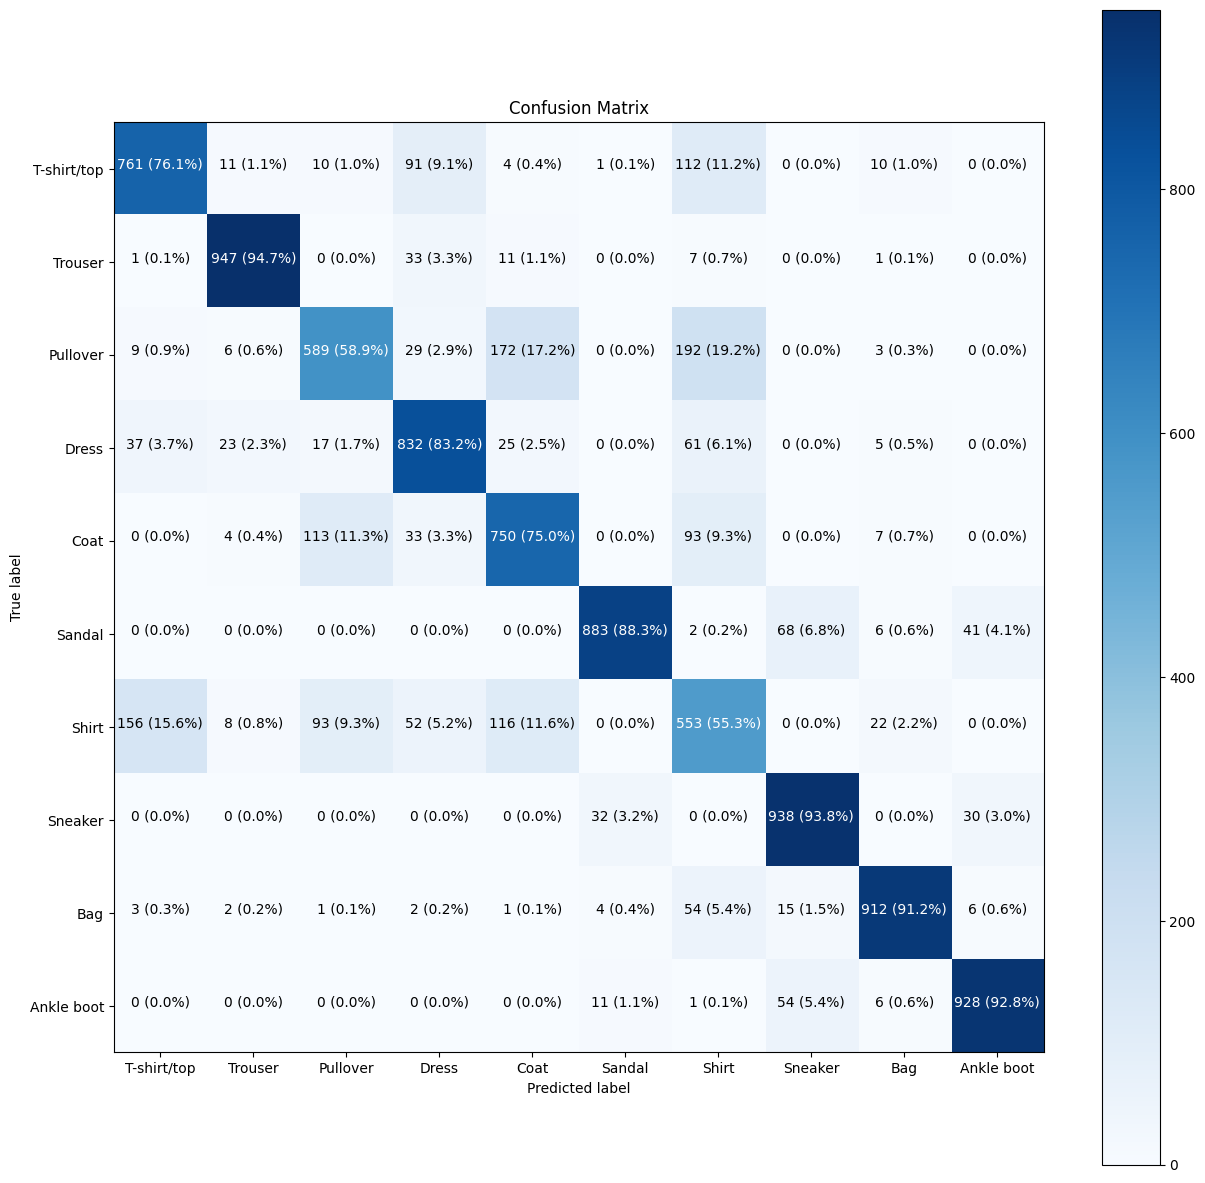

In [216]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names,
                     figsize=(15, 15),
                     text_size=10)

# Create a function to plot a random image along with its prediction

In [228]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Plots a random image, plots it and labels it with a predicted and truth label.

    Args:
        model: a trained model.
        images: a set of random images ( in tensor form ).
        true_labels: array of ground truth labels for images.
        classes: array of class names for images.
    Returns:
        A plot of random images from 'images' with a predicted class label from 'model'
        as well as the truth class label from 'true_labels'
    """
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


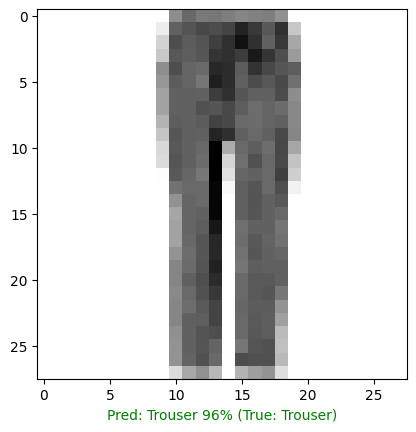

In [234]:
# Check out a random image as well as its prediction
plot_random_image(model=model_11,
                 images = test_data,
                 true_labels=test_labels,
                 classes=class_names)

In [236]:
model_11.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [240]:
model_11.layers[1]

<Dense name=dense_88, built=True>

In [242]:
# get the patterns of a layer in our network
weights, biases = model_11.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.01603321,  0.4421543 , -0.4460961 , -0.10475579],
        [-0.38548762,  1.0629293 , -0.69456965,  0.3215908 ],
        [-0.6008582 ,  0.6742986 , -0.9556064 ,  0.9515437 ],
        ...,
        [ 0.23104677,  0.51566654, -0.5218012 , -0.04005743],
        [-0.04983081,  0.20523493,  0.34090522, -0.39071777],
        [-0.39168257,  0.20371516, -0.46963194,  0.45602283]],
       dtype=float32),
 (784, 4))

In [243]:
# Shape = 1 bias per neuron (we use 4 neurons in teh first layer)
biases, biases.shape

(array([2.874039 , 0.1464094, 1.6917337, 2.0688376], dtype=float32), (4,))

In [250]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_11, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
